In [1]:
import os

In [2]:
token=os.getenv('ACCESS_TOKEN')
token_secret=os.getenv('ACCESS_TOKEN_SECRET')
consumer_key=os.getenv('CONSUMER_KEY')
consumer_secret=os.getenv('CONSUMER_SECRET')

In [59]:
import twitter
api = twitter.Api(consumer_key=consumer_key,
                  consumer_secret=consumer_secret,
                  access_token_key=token,
                  access_token_secret=token_secret,
                  #sleep_on_rate_limit=True
                )

In [60]:
api

# Tweeters using the Hashtag #shdb17

In [67]:
tweets = api.GetSearch(raw_query='q=%23shdb17&count=100&since_id=2017-10-01')
science_hack_tweeters = {tweet.user.id: tweet.user.screen_name for tweet in tweets}
science_hack_tweeters

{15772640: 'ramin__',
 21995182: 'katausten',
 40774011: 'luizalbd',
 73082628: 'talknewvic',
 77477607: 'derjoram',
 99586343: 'lu_cyP',
 274071475: 'UCLbasc',
 700611380: 'rikunert',
 1243981704: 'katihappyy'}

# Followers of a user

In [93]:
followers_shd_berlin = api.GetFollowers(user_id='1531582164', total_count=5000)

In [94]:
followers_shd_berlin

[User(ID=19071614, ScreenName=hirbel),
 User(ID=165745785, ScreenName=Mboathomas),
 User(ID=87736333, ScreenName=orensbruno),
 User(ID=890201033653325824, ScreenName=OneDroneZone),
 User(ID=707715711431475200, ScreenName=tetrapixberlin),
 User(ID=92593495, ScreenName=Fabrice_Briatte),
 User(ID=6840382, ScreenName=Dimelo_fr),
 User(ID=267605227, ScreenName=smlbizsuccess),
 User(ID=830528444932952064, ScreenName=AgelessArtz),
 User(ID=740246779967471616, ScreenName=DAYTRADINGz),
 User(ID=765094, ScreenName=Smily),
 User(ID=2312775529, ScreenName=diessicode),
 User(ID=928537014584127488, ScreenName=microbe_things),
 User(ID=929844827138560000, ScreenName=TheAustinatorAI),
 User(ID=929646331425099776, ScreenName=TopLab_Berlin),
 User(ID=220279273, ScreenName=JuKoe13),
 User(ID=261846355, ScreenName=nahummantra),
 User(ID=33637010, ScreenName=ess_research),
 User(ID=929397386824290304, ScreenName=Kat_Trettenbach),
 User(ID=896324911211401216, ScreenName=shddar),
 User(ID=40180678, ScreenNam

# Members of the SHDB17 Twitter list 
https://twitter.com/SHD_Berlin/lists/shd-berlin-2017

In [70]:
api.GetLists(user_id='1531582164')

[List(ID=928630046448848897, FullName='@SHD_Berlin/shd-berlin-2017', Slug=shd-berlin-2017, User=SHD_Berlin),
 List(ID=873203403538796544, FullName='@SHD_Berlin/shdb17-orga-team', Slug=shdb17-orga-team, User=SHD_Berlin),
 List(ID=779484881285963776, FullName='@SHD_Berlin/shd-berlin-2016', Slug=shd-berlin-2016, User=SHD_Berlin),
 List(ID=230990707, FullName='@SHD_Berlin/berlin-community', Slug=berlin-community, User=SHD_Berlin),
 List(ID=223103221, FullName='@SHD_Berlin/shd-berlin-2015', Slug=shd-berlin-2015, User=SHD_Berlin),
 List(ID=175486869, FullName='@SHD_Berlin/shd-berlin-2014', Slug=shd-berlin-2014, User=SHD_Berlin)]

In [71]:
science_hackers = {user.id: user.screen_name for user in api.GetListMembers(list_id='928630046448848897')}
science_hackers

{11712822: 'li5a',
 14947781: 'onna_no_hito',
 15772640: 'ramin__',
 21492460: 'ellen_koenig',
 21995182: 'katausten',
 29342035: 'PCH_Intl',
 40774011: 'luizalbd',
 51757957: 'genekogan',
 77477607: 'derjoram',
 99586343: 'lu_cyP',
 165745785: 'Mboathomas',
 202275865: 'xMartin',
 226237233: 'arnejenssen',
 326840157: 'dadafoto',
 333494575: 'meredityman',
 378694453: 'sarahhermanutz',
 1112710856: 'AravinthPanch',
 1243981704: 'katihappyy',
 1637049138: 'GoodpatchBerlin',
 2203330990: 'Rick_Scavetta',
 2675053819: 'giu_pap',
 2809668737: 'lukeidesign',
 2867007903: 'robertkovax',
 4414975041: 'Th_Heidtmann',
 715590200794222593: 'sciencejoram',
 804277319510724609: 'nbt_ag',
 819927704850038785: 'eLifeInnovation',
 821041513836724224: 'Volpato1985'}

In [72]:
all_users = {**science_hack_tweeters,  **science_hackers, **{1531582164:'Science Hack Day BLN'}}
len(all_users)

32

In [89]:
# Hack to limit the user list to 15

all_tweeters = list({**science_hack_tweeters,  **science_hackers}.items())

only_11_users = dict(all_tweeters[0:10])

only_11_users[1531582164]='Science Hack Day BLN'
only_11_users

{51757957: 'genekogan',
 73082628: 'talknewvic',
 202275865: 'xMartin',
 1243981704: 'katihappyy',
 1531582164: 'Science Hack Day BLN',
 2203330990: 'Rick_Scavetta',
 2867007903: 'robertkovax',
 715590200794222593: 'sciencejoram',
 804277319510724609: 'nbt_ag',
 819927704850038785: 'eLifeInnovation',
 821041513836724224: 'Volpato1985'}

# Build and visualize as simple NetworkX graph from the Twitter data

In [95]:
import networkx as nx

graph = nx.DiGraph()

In [96]:
def add_shdb_related_followers_to_graph(user_name, user_id):
    followers = api.GetFollowers(user_id=user_id, total_count=5000)
    for follower in followers:
        if follower.id in all_users:
            graph.add_edge(follower.screen_name, user_name)

In [97]:
for user in all_users:
    add_shdb_related_followers_to_graph(user, only_11_users[user])

TwitterError: [{'code': 88, 'message': 'Rate limit exceeded'}]

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

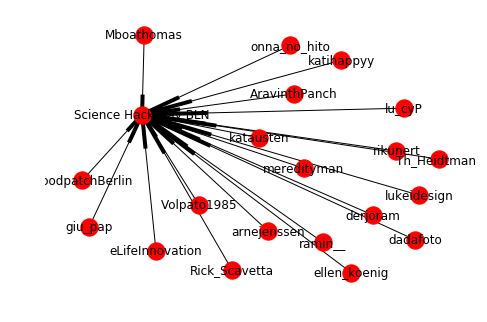

In [41]:
#plt.figure(figsize=(500, 500))
nx.draw(graph, with_labels=True)

# Next steps

 * get followers for all other users from the "all users" list
 * add edges to graph
 * Experiment with metrics to compute to get some interesting resutls